# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# read the csv file

In [2]:
data1=pd.read_csv("kyphosis.csv")

# Data Visualization and Exploration

Print at least 5 rows for sanity check to identify all the features present in the dataset and
if the target matches with them.

In [3]:
data1.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


# Print the description and shape of the dataset.

In [4]:
data1.shape

(81, 4)

In [5]:
data1.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


Provide appropriate visualization to get an insight about the dataset.

In [6]:
data1.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [7]:
data1.info

<bound method DataFrame.info of    Kyphosis  Age  Number  Start
0    absent   71       3      5
1    absent  158       3     14
2   present  128       4      5
3    absent    2       5      1
4    absent    1       4     15
..      ...  ...     ...    ...
76  present  157       3     13
77   absent   26       7     13
78   absent  120       2     13
79  present   42       7      6
80   absent   36       4     13

[81 rows x 4 columns]>

Try exploring the data and see what insights can be drawn from the dataset.


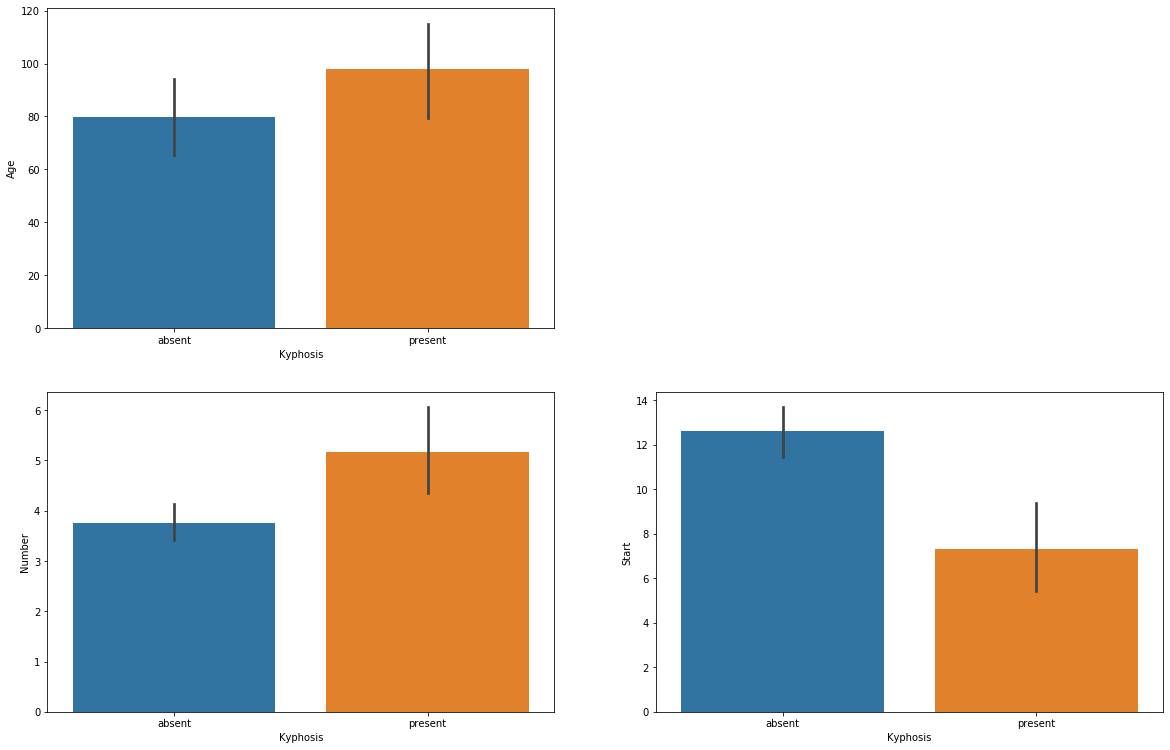

In [8]:
plt.figure(figsize=(20, 20))
plt.subplot(321)
sns.barplot(y= 'Age', x = 'Kyphosis', data = data1)
plt.subplot(323)
sns.barplot(y = 'Number', x= 'Kyphosis', data = data1)
plt.subplot(324)
sns.barplot(y= 'Start', x = 'Kyphosis', data = data1)


# plot the  grouped the data by khyphosis and then took the mean of the number ,start

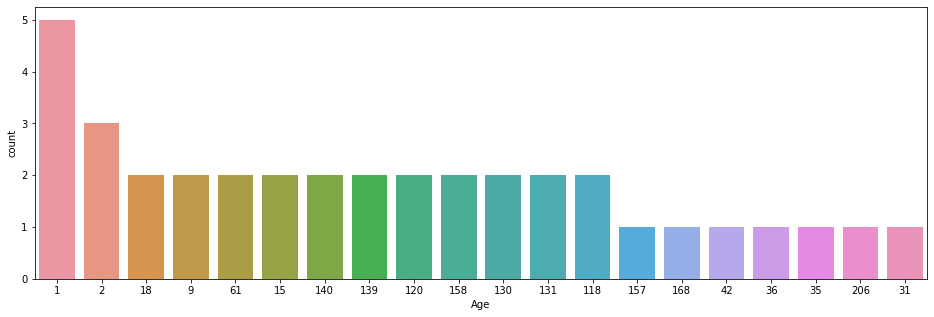

In [9]:
plt.figure(figsize=(16,5))
sns.countplot(x='Age',data = data1,order = data1['Age'].value_counts().iloc[:20].index)

axis(Age) of the plot represents the specific categories being compared, while count axis represents the measured values corresponding to those categories.
example:
age1 group has approxmiate average50% of count

# Data Pre-processing and cleaning

Do the appropriate preprocessing of the data like identifying NULL or Missing Values if
any, . 

In [10]:
data1.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

it has no null value

# handling of outliers

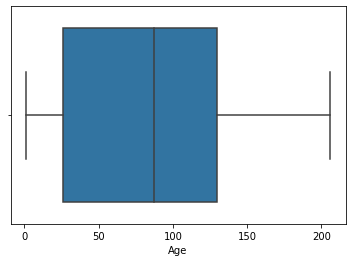

In [11]:
sns.boxplot(data1["Age"],orient='h')

age range has no outliers

In [12]:
data1['Age'].unique()

array([ 71, 158, 128,   2,   1,  61,  37, 113,  59,  82, 148,  18, 168,
        78, 175,  80,  27,  22, 105,  96, 131,  15,   9,   8, 100,   4,
       151,  31, 125, 130, 112, 140,  93,  52,  20,  91,  73,  35, 143,
        97, 139, 136, 121, 177,  68,  72, 120,  51, 102, 114,  81, 118,
        17, 195, 159, 127,  87, 206,  11, 178, 157,  26,  42,  36],
      dtype=int64)

In [13]:
data1['Kyphosis'].unique()

array(['absent', 'present'], dtype=object)

In [14]:
data1['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

# machine learning models hates non-numeric values.
    We cannot put them to our train and test data.
    We need to convert them into numeric values.

In [15]:
for col in data1:
     if(col=='Kyphosis'):
            data1[col]= data1[col].map({'absent':0,'present':1})
            

In [16]:
data1['Kyphosis'].value_counts()

0    64
1    17
Name: Kyphosis, dtype: int64

# Standardization

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(data1)

In [18]:
print(data_scaled.mean(axis=0))
print(data_scaled.std(axis=0))

[-4.11193713e-18  1.00057137e-16 -1.36550579e-16 -9.04626168e-17]
[1. 1. 1. 1.]


# Normalization

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data1_scaled = scaler.fit_transform(data1)

In [21]:
print('means (Age, Number and Start): ', data1_scaled.mean(axis=0))
print('std (Age, Number and Start): ', data1_scaled.std(axis=0))

means (Age, Number and Start):  [0.20987654 0.40319181 0.25617284 0.61728395]
std (Age, Number and Start):  [0.40722031 0.28168034 0.20117444 0.28551298]


In [22]:
data3=data1

In [23]:
data2=data1

# Data Preparation

Do the final feature selection and extract them into Column X and the class label into
Column into Y.

In [24]:
x=data1.drop(['Kyphosis'],axis=1)
y=data1['Kyphosis']

In [25]:
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


Split the dataset into training and test sets.

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [27]:
x_train.shape,x_test.shape

((64, 3), (17, 3))

# Model Building

# LinearRegression

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
y_pred=reg.predict(x_test)

In [31]:
from sklearn import metrics 
mse=metrics.mean_squared_error(y_test,y_pred)
print("Mean_squared_error:",mse)


Mean_squared_error: 0.12371291084427283


In [32]:
rmse=np.sqrt(mse)
print("Root_Mean_squared_Error:",rmse)

Root_Mean_squared_Error: 0.3517284618057982


# LogisticRegression

In [33]:
x=data2.drop(['Kyphosis'],axis=1)
y=data2['Kyphosis']

In [34]:
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
log_reg = LogisticRegression()

In [39]:
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_pred=log_reg.predict(x_test)

In [45]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

In [47]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy_Score:", acc)

Accuracy_Score: 0.8235294117647058


In [48]:
confusion_matrix(y_test, y_pred)

array([[13,  1],
       [ 2,  1]], dtype=int64)

# K-Nearst Neighbor

In [49]:
x=data3.drop(['Kyphosis'],axis=1)
y=data3['Kyphosis']

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Train the model and print the training accuracy and loss values.

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [52]:

from sklearn.metrics import accuracy_score, confusion_matrix
k_range=list(range(3,10))
acc=[]
for i in k_range:
    knn=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    acc.append(metrics.accuracy_score(y_test,y_pred))

In [53]:
acc

[0.7058823529411765,
 0.7647058823529411,
 0.7647058823529411,
 0.7647058823529411,
 0.7647058823529411,
 0.7647058823529411,
 0.7647058823529411]

# Do the prediction for the test data and display the results for the inference.

In [54]:
print("Report:", classification_report(y_test, y_pred))

Report:               precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       0.00      0.00      0.00         4

    accuracy                           0.76        17
   macro avg       0.38      0.50      0.43        17
weighted avg       0.58      0.76      0.66        17



C:\Users\anamika\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
